PRINCIPAL COMPONENT ANALYSIS

DIMENTIONALItY REDUCTION

In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

#define a matrix
A=array([
    [1,2],
    [3,4],
    [5,6]
])
print('--------------------A----------------------------')
print(A)

--------------------A----------------------------
[[1 2]
 [3 4]
 [5 6]]


In [3]:
M=mean(A.T,axis=1)
print(M)

[3. 4.]


In [5]:
#center columns by subtracting column means
C=A-M
print('--------------------------------------C--------------------------------------')
print(C)

--------------------------------------C--------------------------------------
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


In [6]:
#calculate covariance matrix
V=cov(C.T)
print(V)

[[4. 4.]
 [4. 4.]]


In [7]:
#eigen decompostion of covariance matrix
values,vectors=eig(V)

print(values)
print(vectors)

[8. 0.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [8]:
#project data
P=vectors.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [12]:
from sklearn.datasets import load_breast_cancer

In [13]:
cancer_dataset=load_breast_cancer()

In [14]:
type(cancer_dataset)

sklearn.utils._bunch.Bunch

In [15]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [18]:
df=pd.DataFrame(cancer_dataset['data'],columns=cancer_dataset['feature_names'])
df.head

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In [19]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
scaled_data=scaler.fit_transform(df)

In [21]:
##apply pca algorithm
from sklearn.decomposition import PCA

In [22]:
pca=PCA(n_components=2)

In [25]:
data_pca=pca.fit_transform(scaled_data)

In [26]:
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [27]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

Text(0, 0.5, 'Second Principal component')

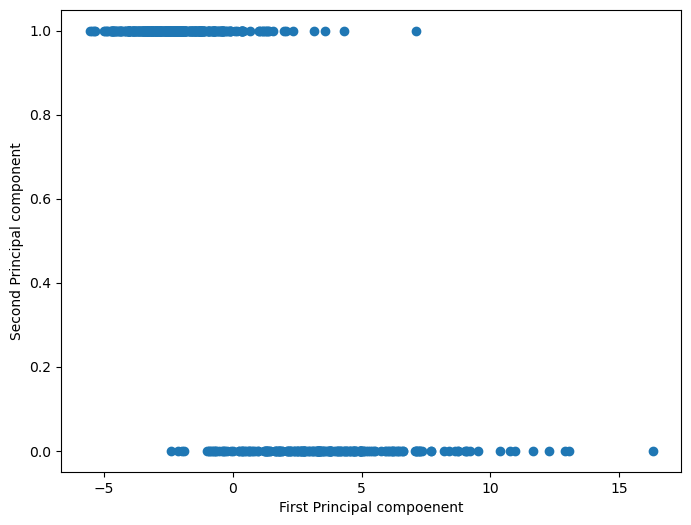

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,:1],y=cancer_dataset['target'])
plt.xlabel('First Principal compoenent')
plt.ylabel('Second Principal component')